In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table- make the variable
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

most_recent = session.execute('SELECT date FROM measurement ORDER BY date DESC LIMIT 1').fetchall()
print(most_recent)

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
[('2017-08-23',)]


Query Date:  2016-08-23
            Date  Precipitation
0     2016-08-23           0.00
1009  2016-08-23            NaN
1529  2016-08-23           1.79
704   2016-08-23           0.05
361   2016-08-23           0.15
...          ...            ...
1527  2017-08-22           0.00
1008  2017-08-23           0.00
360   2017-08-23           0.00
1528  2017-08-23           0.08
2229  2017-08-23           0.45

[2230 rows x 2 columns]


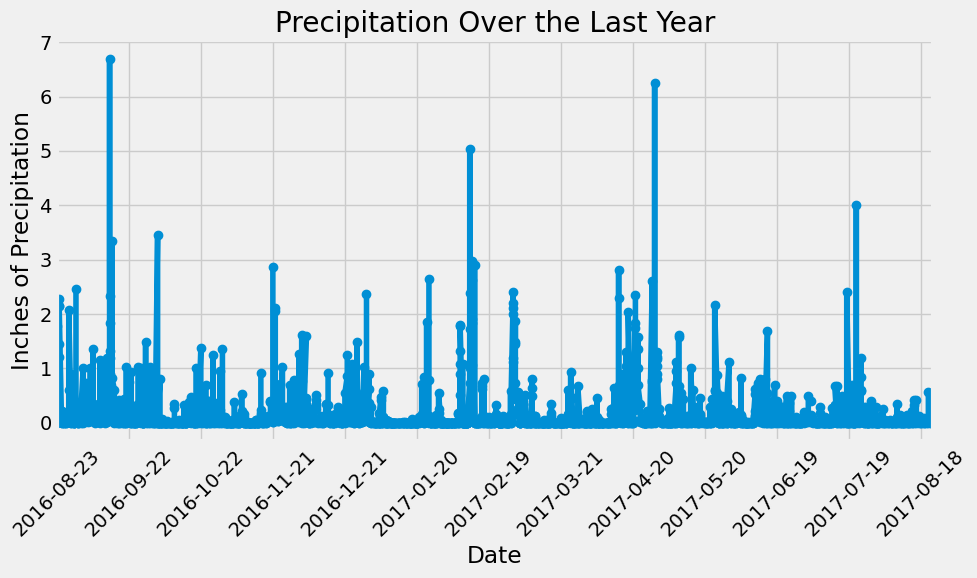

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", one_year)
# Perform a query to retrieve the data and precipitation scores
one_year_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(one_year_prcp, columns=['Date', 'Precipitation'])
df
# Sort the dataframe by date
df_sorted = df.sort_values(by='Date')
print(df_sorted)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6)) 
plt.plot(df_sorted['Date'], df_sorted['Precipitation'], marker='o', linestyle='-')
plt.title('Precipitation Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Inches of Precipitation')
plt.xticks(df.index[::30], rotation=45)
start_date = df_sorted['Date'].iloc[0]  # Start date from your data
end_date = df_sorted['Date'].iloc[-1]  # End date from your data
plt.xlim(start_date, end_date)
last_index = df.index[-1]
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df.describe()
print(summary_stats)

       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(Station).count()
print(stations)

9


In [16]:
station_counts = session.query(Measurement.station, func.count(Measurement.station).label('count')) \
                        .group_by(Measurement.station) \
                        .order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                        filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

<Axes: ylabel='Frequency'>

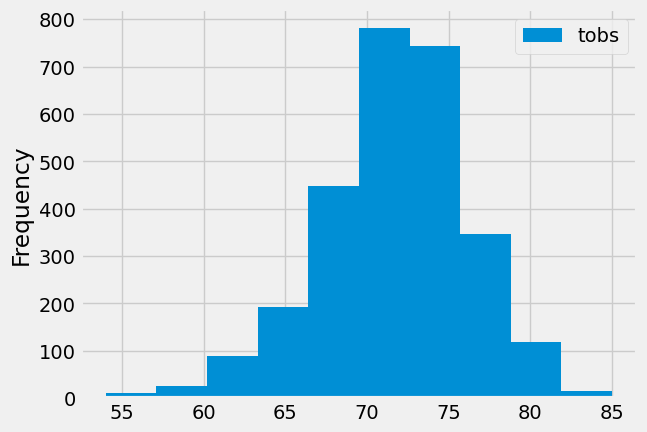

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').all()

results_df = pd.DataFrame(results, columns=['tobs'])
results_df.plot.hist()

In [33]:
# Close Session
session.close()